<a href="https://colab.research.google.com/github/enio-martinelli/Faculdade/blob/main/Classifica%C3%A7%C3%A3o_com_Redes_Neurais_Artificiais_pelo_m%C3%A9todo_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALUNO:** Enio da Costa Martinelli  **RA:** 790891

#**Etapas 1 - 3**
1. O conjunto de dados selecionado foi Wine Data Set, disponível no pacote `sklearn.datasets`.
2. Etapa não necessária


In [164]:
#3.
from sklearn.datasets import load_wine

wine = load_wine()

#**Etapas 4 - 6**

In [165]:
#4.
import numpy as np
import pandas as pd

bc = pd.DataFrame(wine.data, columns=wine.feature_names)
bc['class'] = wine.target
bc = bc.sample(frac=1).reset_index(drop=True)
y = bc['class']   
X = bc.drop('class', axis=1)  
y = pd.DataFrame(y)


5. Etapa não necessária

In [166]:
#6.
#função que, dado um conjunto de dados, separe esse conjunto em n folds(n subconjuntos).
def create_fold(data, number_folds):
    foldSize = int(len(data)/number_folds) #Determina o tamanho de cada fold
    dataFold = []
    resto = len(data)%number_folds #Determina quantos folds que terão 1 instância a mais,
                                    #ja que number_folds pode não ser divisor do total de instâncais
    cont = 0
    pos = 0
    for j in range(number_folds):
        if cont<resto:
            dataFold.append(data.iloc[pos:(pos+foldSize+1),:])
            pos+= foldSize+1
        else:
            dataFold.append(data.iloc[pos:(pos+foldSize),:])
            pos+=foldSize
        cont+=1
    return dataFold

#Separando a matriz de atributos e o vetor de classes em 10 folds
XFold = create_fold(X,10)
yFold = create_fold(y,10)

# Função para plotar a rede neural

In [21]:
# Fonte: https://stackoverflow.com/questions/29888233/how-to-visualize-a-neural-network

from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 600
        self.horizontal_distance_between_neurons = 100
        self.neuron_radius = 50
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

#**Etapas 7 - 10**

Avaliação do modelo gerado usando dados de teste do 1º fold


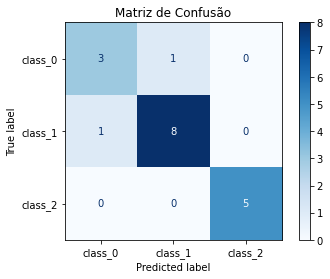

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       0.75      0.75      0.75         4
     class_1       0.89      0.89      0.89         9
     class_2       1.00      1.00      1.00         5

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18


Avaliação do modelo gerado usando dados de teste do 2º fold


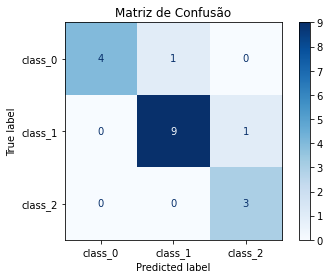

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       0.80      1.00      0.89         4
     class_1       0.90      0.90      0.90        10
     class_2       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.90      0.88      0.88        18
weighted avg       0.90      0.89      0.89        18


Avaliação do modelo gerado usando dados de teste do 3º fold


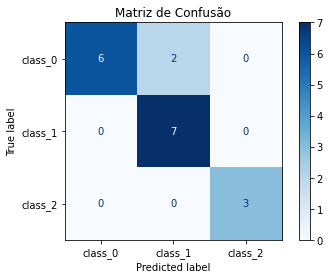

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       0.75      1.00      0.86         6
     class_1       1.00      0.78      0.88         9
     class_2       1.00      1.00      1.00         3

    accuracy                           0.89        18
   macro avg       0.92      0.93      0.91        18
weighted avg       0.92      0.89      0.89        18


Avaliação do modelo gerado usando dados de teste do 4º fold


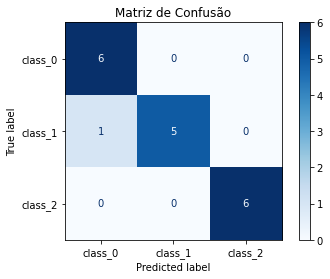

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       1.00      0.86      0.92         7
     class_1       0.83      1.00      0.91         5
     class_2       1.00      1.00      1.00         6

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18


Avaliação do modelo gerado usando dados de teste do 5º fold


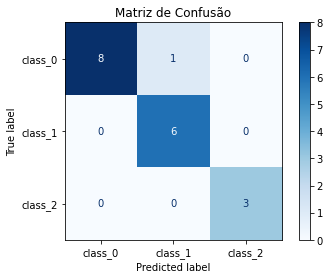

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       0.89      1.00      0.94         8
     class_1       1.00      0.86      0.92         7
     class_2       1.00      1.00      1.00         3

    accuracy                           0.94        18
   macro avg       0.96      0.95      0.95        18
weighted avg       0.95      0.94      0.94        18


Avaliação do modelo gerado usando dados de teste do 6º fold


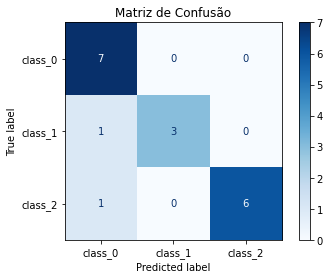

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       1.00      0.78      0.88         9
     class_1       0.75      1.00      0.86         3
     class_2       0.86      1.00      0.92         6

    accuracy                           0.89        18
   macro avg       0.87      0.93      0.89        18
weighted avg       0.91      0.89      0.89        18


Avaliação do modelo gerado usando dados de teste do 7º fold


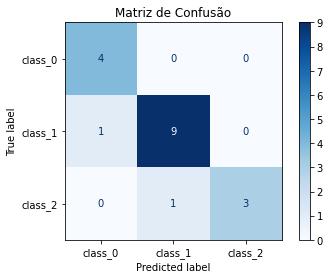

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       1.00      0.80      0.89         5
     class_1       0.90      0.90      0.90        10
     class_2       0.75      1.00      0.86         3

    accuracy                           0.89        18
   macro avg       0.88      0.90      0.88        18
weighted avg       0.90      0.89      0.89        18


Avaliação do modelo gerado usando dados de teste do 8º fold


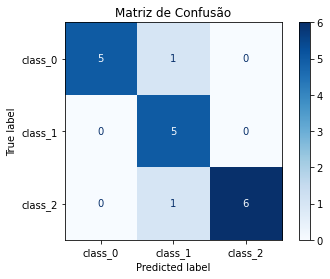

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       0.83      1.00      0.91         5
     class_1       1.00      0.71      0.83         7
     class_2       0.86      1.00      0.92         6

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.88        18


Avaliação do modelo gerado usando dados de teste do 9º fold


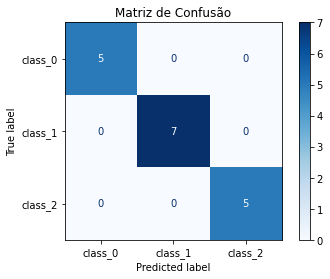

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         5
     class_1       1.00      1.00      1.00         7
     class_2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Avaliação do modelo gerado usando dados de teste do 10º fold


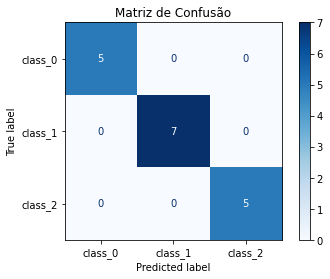

Medidas de precisão, revocação, medida F e acurácia: 

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         5
     class_1       1.00      1.00      1.00         7
     class_2       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17




In [167]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier

#Ignora alguns warnings
import warnings 
warnings.filterwarnings('ignore')

crs = [] #Vetor que vai armazenar todos valores de classification_report dos 10folds
class_names = wine.target_names #Nome das classes do conjunto de dados
title = "Matriz de Confusão" #Título da matriz de confusão
mlps = [] #Vetor para armazenar o resultado do fit() de cada treino


for i in range(len(XFold)): #7. Método de amostragem: 10-fold cross-validation
    #Vetores para armazenar o conjunto de treino, de X(matriz de atributos) e y(vetor de classes)
    X_train = pd.DataFrame(None)
    y_train = pd.DataFrame(None) 
    for j in range(len(XFold)):
      if i != j:
          #Conjunto de treino (9 folds)
          X_train = pd.concat([X_train, XFold[j]])
          y_train = pd.concat([y_train, yFold[j]])
    #Conjunto de testes (fold restante)
    X_test = XFold[i]
    y_test = yFold[i]

    #8. Arquitetura da Rede Neural: Camada input(30 inputs), única camada escondida(22 neurônios), camada output(2 outputs)
    mlp = MLPClassifier(hidden_layer_sizes=(110,),activation='logistic', solver='lbfgs', random_state=1, max_iter=2000, verbose=True)
    mlps.append(mlp.fit(X_train, y_train))
    
    #10.
    predicted = mlp.predict(X_test) #classificação dos dados de teste
    #Matriz de confusão e medidas de precisão, revocação, medida F e acurácia para cada fold
    disp = plot_confusion_matrix(mlp, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    print(f"Avaliação do modelo gerado usando dados de teste do {i+1}º fold")
    plt.show()
    print("Medidas de precisão, revocação, medida F e acurácia: \n")
    print(f"{classification_report(predicted, y_test, target_names=class_names)}\n")
    #Transformações necessárias para poder acessar cada valor de classification_report, 
    #para cálculo de médias e desvio padrão
    cr = classification_report(predicted, y_test, target_names=class_names, output_dict=True)
    cr = pd.DataFrame(cr).T
    #Ao mudar o tipo de dados de str para dictionary, o valor accuracy de support muda
    cr.iloc[3,3] = cr.iloc[4,3] #aqui é feita a correção
    crs.append(cr)

In [168]:
#9. Pesos conectando todas as camadas da rede do 10º fold
#1ª camada -> Camada de input
#2ª camada -> Única camada escondida
#3ª camada -> Camada de output
for i in range(len(mlp.coefs_)):
  print(f"Pesos entre {i+1}ª e {i+2}ª camadas:")
  print(mlp.coefs_[i])


Pesos entre 1ª e 2ª camadas:
[[-2.02012853e-02  5.36421074e-02 -1.21706480e-01 ...  1.04554501e-01
  -9.11488938e+00  1.25869708e-01]
 [-7.97745597e-02 -8.83460705e-02  1.05323435e-01 ...  1.09066703e-01
   1.85828300e-01 -1.17136686e-01]
 [-7.88358390e-02 -4.08872555e-02 -8.98407013e-02 ...  2.96559986e-02
   1.79313364e+00  3.84025991e-02]
 ...
 [-7.48528665e-02  6.15795319e-02 -1.19952387e-01 ...  1.19773189e-01
  -3.18618355e-01  1.20338105e-01]
 [ 4.57857194e-03 -7.97896199e-02 -1.03577878e-01 ...  2.40597882e-02
   2.44251620e+00  1.14023498e-02]
 [ 4.88549922e-02  1.04827812e-01  8.82857984e-02 ... -5.39920769e-02
  -2.00994964e+00  1.62978154e-01]]
Pesos entre 2ª e 3ª camadas:
[[ 8.44450375e-02  9.17262655e-03 -2.47981558e-01]
 [ 6.47614449e-02 -2.29445225e-02 -4.81478756e-02]
 [ 2.80611159e-01 -7.85269025e-02 -2.71666901e-01]
 [ 7.64222655e-02  7.77242301e-02  9.36008676e-02]
 [ 4.27327282e-02  7.95806135e-02  9.99288907e-02]
 [-1.17278048e-02  1.46883939e-02  1.55738801e-03]


#**Etapa 11**
 Nesta etapa o algoritmo faz a leitura do valor na posição `[i][j]` da tabela gerada por `classification_report`, em todas as 10 tabelas geradas, e armazena esses valores em um vetor, para calcular a média e o desvio padrão dessa posição `[i][j]`. O resultado dos calculos é armazenado em suas respectivas tabelas, que seguem o modelo gerado por `classification_report`. 
  Isso é feito para todas as posições `[i][j]` da tabela gerada por `classification_report`.

In [169]:
#11.

#Cria um dataFrame no mesmo formato dos resultados de classification_report, para armazenar média e desvio padrão
media = crs[0].copy()
desvioPadrao = crs[0].copy()

for i in range(media.shape[0]):
  for j in range(media.shape[1]):
    valores = []
    for k in range(len(crs)):
      valores.append(crs[k].iloc[i][j]) #Aloca os valores da coordenada [i][j], de todas as tabelas classification_report
    media.iloc[i][j] = np.mean(valores) #Calculo da média 
    desvioPadrao.iloc[i][j] = np.std(valores) #Caculo do desvio padrão

#Impressão dos resultados com valores aproximados em 2 casa decimais
print("Média\n")
print(media.round(2),"\n")
print("Desvio Padrão\n")
print(desvioPadrao.round(2))

Média

              precision  recall  f1-score  support
class_0            0.90    0.92      0.90      5.8
class_1            0.93    0.90      0.91      7.4
class_2            0.95    0.98      0.96      4.6
accuracy           0.92    0.92      0.92     17.8
macro avg          0.93    0.93      0.92     17.8
weighted avg       0.93    0.92      0.92     17.8 

Desvio Padrão

              precision  recall  f1-score  support
class_0            0.10    0.10      0.07     1.60
class_1            0.08    0.10      0.05     2.11
class_2            0.09    0.08      0.06     1.20
accuracy           0.04    0.04      0.04     0.40
macro avg          0.05    0.04      0.05     0.40
weighted avg       0.04    0.04      0.04     0.40
